In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [37]:
ab_testing = pd.read_csv('/content/drive/MyDrive/용훈/Data Analysis/ab_test/ab_testing_kaggle/ab_data.csv')
ab_testing

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
...,...,...,...,...,...
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0
294476,697314,2017-01-15 01:20:28.957438,control,old_page,0


user_id : 사용자 ID

timestamp : 타임 스탬프(시간 표기)

group : 사용자가 control(기존 버전) 혹은 treatment(변화 버전) 그룹에 속하는 지 여부

landing_page : 사용자가 최초로 보게 되는 페이지가 new_page 혹은 old_page인지 여부

converted : 사용자가 0(전환하지 않음) 혹은 1(전환)인지 여부

In [38]:
ab_testing.dtypes

,0
user_id,int64
timestamp,object
group,object
landing_page,object
converted,int64


In [39]:
ab_testing.isna().sum()

,0
user_id,0
timestamp,0
group,0
landing_page,0
converted,0


In [40]:
ab_testing.nunique()

,0
user_id,290584
timestamp,294478
group,2
landing_page,2
converted,2


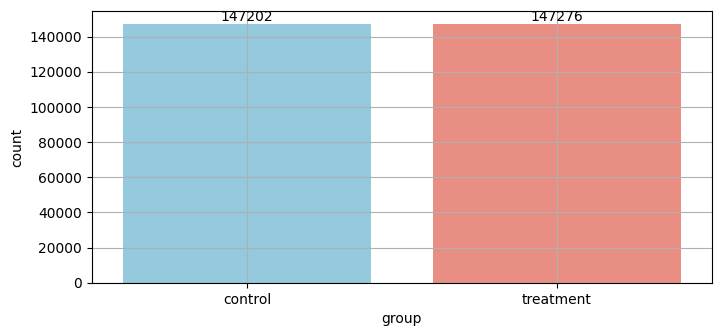

In [41]:
plt.figure(figsize=(8, 12))

plt.subplot(311)
ax1 = sns.countplot(x='group', data=ab_testing, palette=['skyblue', 'salmon'])
for container in ax1.containers:
    ax1.bar_label(container, label_type='edge')
plt.grid()

plt.show()

control 그룹과 treatment 그룹에 속하는 사용자 수에는 큰 차이가 없습니다.

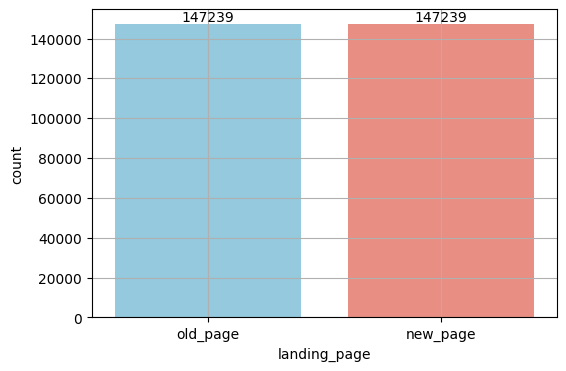

In [42]:
plt.figure(figsize=(6, 4))

ax2 = sns.countplot(x='landing_page', data=ab_testing, palette=['skyblue', 'salmon'])
for container in ax2.containers:
    ax2.bar_label(container, label_type='edge')
plt.grid()

plt.show()

landing_page가 new_page인 사용자와 old_page인 사용자의 수는 같다.

하지만 group의 두 집단의 각 수와 landing_page의 두 집단의 각 수가 일치하지 않는다.

Timestamp가 있으므로 1차 테스트에서는 데이터 전처리 작업을 수행하지 않고 실행한다.

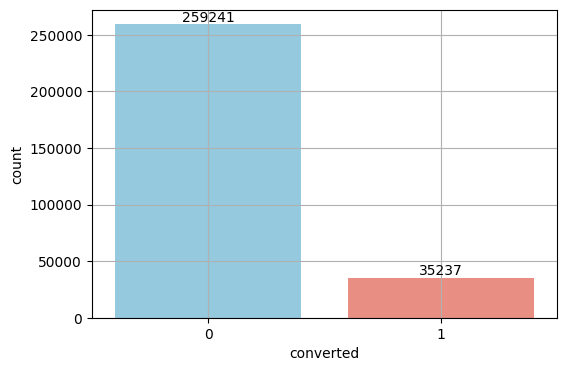

In [43]:
plt.figure(figsize=(6, 4))

ax3 = sns.countplot(x='converted', data=ab_testing, palette=['skyblue', 'salmon'])
for container in ax3.containers:
    ax3.bar_label(container, label_type='edge')
plt.grid()
plt.show()

전환하지 않은 사용자(0) 수가 전환한 사용자(1) 수보다 압도적으로 많습니다.

물론 전환율 지표에서는 전환한 사람이 전환하지 않은 사람보다 적을 수 밖에 없지만,

이 전환율을 증가시키는 것 또한 중요한 목표라고 볼 수 있을 것입니다.

비율: 35237 / 294,478 = 0.1196%

## 가설 설정
1. control 그룹의 전환율보다 treatment 그룹의 전환율이 더 높을 것이다.
2. old_page 그룹의 전환율보다 new_page 그룹의 전환율이 더 높을 것이다.

treatment 그룹과 new_page 그룹은 기존 버전을 개선한 형태이기 때문에 보통은 새로운 버전이 전환율을 높이는 데 더 효과적일 것으로 예상된다.

converted       0      1
group                   
control    129479  17723
treatment  129762  17514


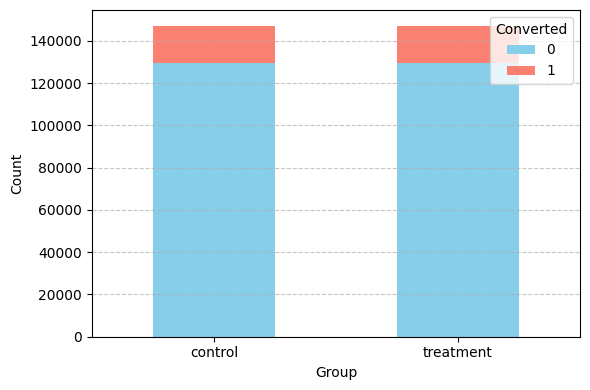

In [75]:
ct1 = pd.crosstab(ab_testing['group'], ab_testing['converted'])
print(ct1)

ct1.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'], figsize=(6, 4))

plt.xlabel("Group")
plt.ylabel("Count")
plt.legend(title="Converted", loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

이 실험은 두 그룹 간 전환율(모비율)의 차이를 알아보는 검정이기 때문에, group과 converted를 활용해 교차표를 구성한다.

위 결과를 봤을 때 미세하지만 기존 페이지보다 새로운 페이지의 전환율이 더 떨어지는 것으로 보인다.

두 그룹 간의 전환 여부를 알아야 하기 때문에 카이제곱 검정을 한다.


In [45]:
from scipy.stats import chi2_contingency

# 카이제곱 검정 수행
chi2, p, dof, expected = chi2_contingency(ct1)

print("Chi2 통계량:", chi2)
print("p-value:", p)

Chi2 통계량: 1.5159618356336582
p-value: 0.2182316121631168


가설 1. control 그룹의 전환율보다 treatment 그룹의 전환율이 더 높을 것이다.

검정 결과 : p-value가 0.21수준으로 유의수준 0.05보다 매우 크기 때문에 귀무가설을 기각하지 못함.

control 그룹의 전환율보다 treatment 그룹의 전환율이 높였다는 증거는 통계적으로 유의하지 않습니다.

converted          0      1
landing_page               
new_page      129741  17498
old_page      129500  17739


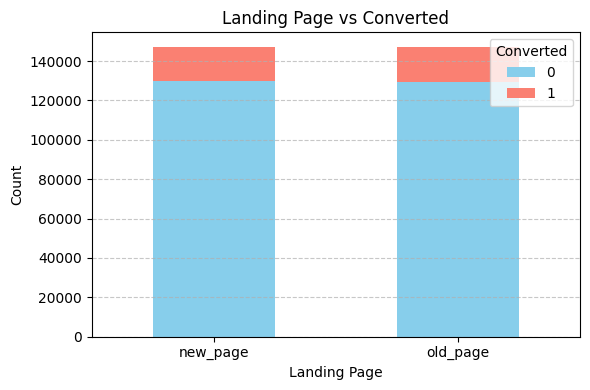

In [46]:
ct2 = pd.crosstab(ab_testing['landing_page'], ab_testing['converted'])
print(ct2)

ct2.plot(kind='bar',
        stacked=True, # 막대 그래프 위로 보여줌
        color=['skyblue', 'salmon'],
        figsize=(6, 4))

plt.title("Landing Page vs Converted")
plt.xlabel("Landing Page")
plt.ylabel("Count")
plt.legend(title="Converted", loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Langing Page과 converted를 활용해 교차표를 구성한다.
두 그룹 간의 전환 여부를 알아야 하기 때문에 카이제곱 검정을 한다.

In [47]:
# 카이제곱 검정 수행
chi2, p, dof, expected = chi2_contingency(ct2)

print("Chi2 통계량:", chi2)
print("p-value:", p)

Chi2 통계량: 1.85683247803069
p-value: 0.17299082326655632


가설 2. old_page 그룹의 전환율보다 new_page 그룹의 전환율이 더 높을 것이다.

검정 결과 : p-value가 0.17수준으로 유의수준 0.05보다 매우 크기 때문에 귀무가설을 기각하지 못함

새로운 페이지가 기존 페이지보다 전환율을 높였다는 증거는 통계적으로 유의하지 않습니다.

## 1차 결론
따라서 본 A/B 테스트에서는 신규 버전(treatment, new_page)의 도입이 기존 버전(control, old_page)에 비해 전환율을 유의미하게 개선한다고 보기 어렵습니다.

이는 곧, 사용자에게 새 페이지를 보여주는 것이 전환율 향상으로 이어지지 않음을 시사하며,
추가적인 개선 없이 현재 상태에서 기존 페이지를 유지하거나 다른 방향으로 실험을 설계하는 것이 더 효율적일 수 있습니다.



# 2차 EDA
1차 EDA에서 landing_page가 new_page인 사용자와 old_page인 사용자의 수는 같다.

하지만 group의 두 집단의 각 수와 landing_page의 두 집단의 각 수가 일치하지 않는다.

2차 EDA에서는 timestamp를 고려하지 않고 group와 landing_page에서 각 두 집단에 모두 속해 있는 사용자를 제외하고 2차 검증에 들어간다.

In [48]:
# 총 컬럼의 수 : 294478

In [49]:
double_group_count = ab_testing.groupby('user_id')['group'].nunique().value_counts()
double_group_count

,count
group,
1,288689
2,1895


In [50]:
double_landing_page_count = ab_testing.groupby('user_id')['landing_page'].nunique().value_counts()
double_landing_page_count

,count
landing_page,
1,288586
2,1998


In [51]:
print(double_group_count / double_group_count.sum())
print(double_landing_page_count / double_landing_page_count.sum())

group
1    0.993479
2    0.006521
Name: count, dtype: float64
landing_page
1    0.993124
2    0.006876
Name: count, dtype: float64


raw data의 총 컬럼 수는 294478이다.

확인 결과 group와 landing_page에 두 속한 유저가 각각 1895명과 1998명으로 나타났고 count의 총합이 294478보다 낮은 것으로 보아 특정 유저들이 여러 번(2번 이상)의 Timestamp를 남긴 것을 확인된다.

비율로 봤을 때는 큰 영향을 미칠 것 같지 않지만 정확한 테스트 진행을 위해서 두 집단에 모두 속한 유저는 제외하고 같은 유저가 같은 페이지에서 여러 번의 Timestamp를 남겼을 수 있으므로 중복도 제거한다.

In [52]:
single_users = (ab_testing.groupby('user_id')['group'].nunique() == 1)
single_users = single_users[single_users]
ab_testing_single_users = ab_testing[ab_testing['user_id'].isin(single_users.index)]
ab_testing_single_users

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
...,...,...,...,...,...
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0
294476,697314,2017-01-15 01:20:28.957438,control,old_page,0


In [53]:
single_users = (ab_testing_single_users.groupby('user_id')['landing_page'].nunique() == 1)
single_users = single_users[single_users]
ab_testing_single_users = ab_testing_single_users[ab_testing_single_users['user_id'].isin(single_users.index)]
ab_testing_single_users

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
...,...,...,...,...,...
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0
294476,697314,2017-01-15 01:20:28.957438,control,old_page,0


In [54]:
double_group_count = ab_testing_single_users.groupby('user_id')['group'].nunique().value_counts()
double_group_count

,count
group,
1,286691


In [55]:
double_group_count = ab_testing_single_users.groupby('user_id')['group'].nunique().value_counts()
double_group_count

,count
group,
1,286691


group와 landing_page에 각 두 집단에 중복으로 속해있는 사용자를 제거하였다.

다음으로는 timestamp를 여러 번 남긴 유저를 제거한다.

In [62]:
duplication_timesatamp_count = ab_testing_single_users.groupby('user_id')['timestamp'].count()
duplication_timesatamp_count

,timestamp
user_id,
630000,1
630001,1
630002,1
630003,1
630004,1
...,...
945994,1
945996,1
945997,1


In [68]:
duplication_timestamp_count = ab_testing_single_users.groupby('user_id')['timestamp'].count()
user_count_by_timestamp_freq = duplication_timestamp_count.value_counts().sort_index()
user_count_by_timestamp_freq

,count
timestamp,
1,286690
2,1


In [65]:
duplication_timesatamp_count[duplication_timesatamp_count >= 2]

,timestamp
user_id,
773192,2


In [71]:
ab_testing_single_users = ab_testing_single_users[ab_testing_single_users['user_id'] != 773192]
# df = df.drop(df[df['user_id'] == 773192].index)
ab_testing_single_users

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
...,...,...,...,...,...
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0
294476,697314,2017-01-15 01:20:28.957438,control,old_page,0


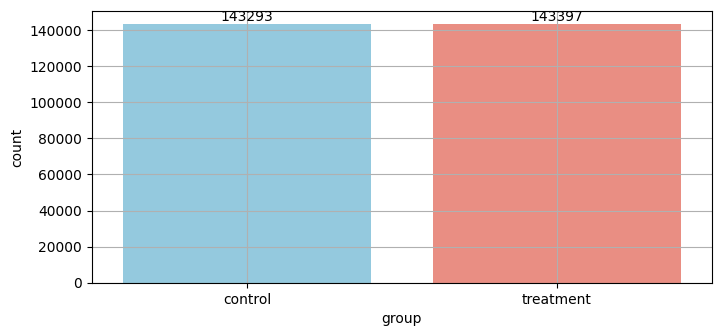

In [72]:
plt.figure(figsize=(8, 12))

plt.subplot(311)
ax1 = sns.countplot(x='group', data=ab_testing_single_users, palette=['skyblue', 'salmon'])
for container in ax1.containers:
    ax1.bar_label(container, label_type='edge')
plt.grid()

plt.show()

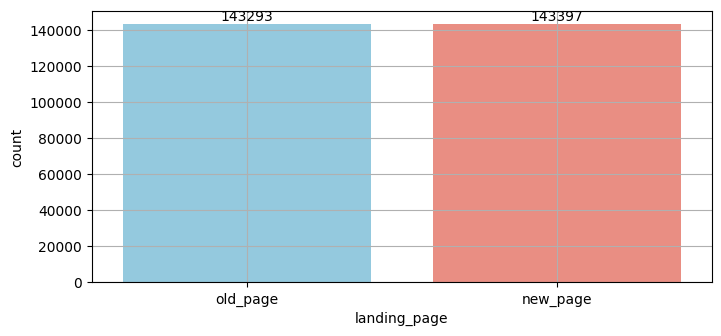

In [73]:
plt.figure(figsize=(8, 12))

plt.subplot(311)
ax1 = sns.countplot(x='landing_page', data=ab_testing_single_users, palette=['skyblue', 'salmon'])
for container in ax1.containers:
    ax1.bar_label(container, label_type='edge')
plt.grid()

plt.show()

데이터 전처리 결과 group와 landing_page의 각 두 집단의 수가 같아진 것을 확인할 수 있다.

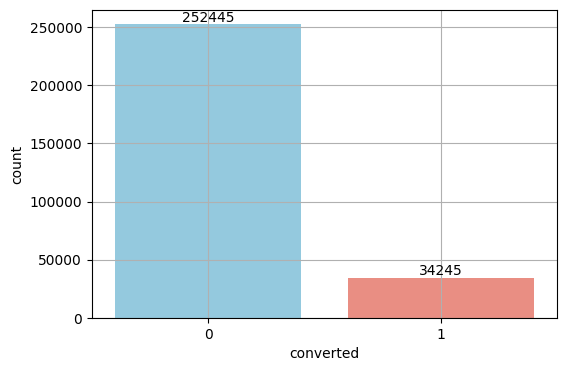

In [74]:
plt.figure(figsize=(6, 4))

ax3 = sns.countplot(x='converted', data=ab_testing_single_users, palette=['skyblue', 'salmon'])
for container in ax3.containers:
    ax3.bar_label(container, label_type='edge')
plt.grid()
plt.show()

1차 전환율은 35237 / 294,478 = 0.1196% 이였다.

데이터 전처리 후 전환율은 34245 / 286,690 = 0.1194이다.

1차 마찬가지로 전환율 지표와 거의 차이가 없다.

## 가설 설정
1. old_page 그룹의 전환율보다 new_page 그룹의 전환율이 더 높을 것이다.

가설은 1차와 달리 하나이다. 그 이유는 group의 중복을 제거하여 control-old_page / treament-new_page의 구조를 가지기 때문이다.

converted       0      1
group                   
control    126073  17220
treatment  126372  17025


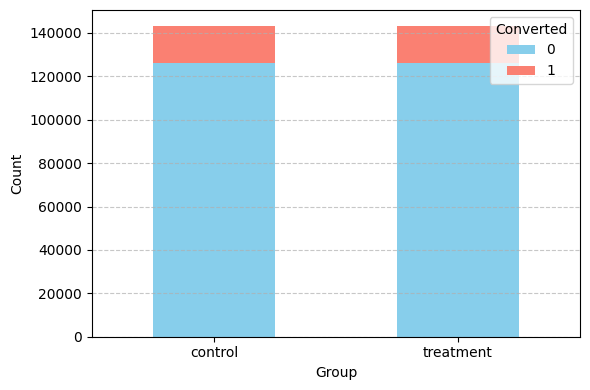

In [76]:
ct3 = pd.crosstab(ab_testing_single_users['group'], ab_testing_single_users['converted'])
print(ct3)

ct3.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'], figsize=(6, 4))

plt.xlabel("Group")
plt.ylabel("Count")
plt.legend(title="Converted", loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

위 결과를 봤을 때 1차와 비슷하게 미세하지만 기존 페이지보다 새로운 페이지의 전환율이 더 떨어지는 것으로 보인다.

In [77]:
# 카이제곱 검정 수행
chi2, p, dof, expected = chi2_contingency(ct3)

print("Chi2 통계량:", chi2)
print("p-value:", p)

Chi2 통계량: 1.4130704135085597
p-value: 0.2345473551640334


가설 1. old_page 그룹의 전환율보다 new_page 그룹의 전환율이 더 높을 것이다.

검정 결과 : p-value가 0.23수준으로 유의수준 0.05보다 매우 크기 때문에 귀무가설을 기각하지 못함.

# 최종 결론
이에 따라 새로운 페이지가 기존 페이지보다 전환율을 높였다는 증거는 통계적으로 유의하지 않습니다.

이는 곧, 사용자에게 새 페이지를 보여주는 것이 전환율 향상으로 이어지지 않음을 시사하며, 추가적인 개선 없이 현재 상태에서 기존 페이지를 유지하거나 다른 방향으로 실험을 설계하는 것이 더 효율적일 수 있습니다.